<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_Etivity-2

In [382]:
#@title Current Date
Today = '2021-08-22' #@param {type:"date"}


In [383]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20208197" #@param {type:"string"}
Student_full_name = "Raphael A BEREHOUDOUGOU" #@param {type:"string"}
#@markdown ---

In [384]:
#@title Notebook information
Notebook_type = 'Example' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = 'Draft' #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [385]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [386]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import arviz as az
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

In [387]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [388]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [389]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-ET5003/ET5003_SEM1_2021-2/tree/main/Week-3). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Train dataset

In [390]:
#
syntPath = '/content/drive/MyDrive/Colab Notebooks/e-tivity2/'
# training file
filename1 = 'house_train.csv'
# test file
filename2 = 'house_test.csv'
# true price
filename3 = 'true_price.csv'

# training dataset: 
training_file = syntPath+filename1
# test dataset: 
testing_file = syntPath+filename2
# cost dataset: 
cost_file = syntPath+filename3

In [391]:
# load training data
dftrain = pd.read_csv(training_file)
# show first data frame rows 
dftrain.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
0,996887,Portmarnock,NaN,NaN,NaN,Dublin,A SELECTION OF 4 AND 5 BEDROOM FAMILY HOMES LO...,prod,NaN,None,53.418216,-6.149329,18.0,NaN,new_development_parent,NaN,NaN
1,999327,Lucan,NaN,NaN,NaN,Dublin,**Last 2 remaining houses for sale ***\n\nOn v...,prod,NaN,None,53.364917,-6.454935,3.0,NaN,new_development_parent,NaN,NaN
2,999559,Rathfarnham,NaN,NaN,NaN,Dublin,Final 4 &amp; 5 Bedroom Homes for Sale\n\nOn V...,prod,NaN,None,53.273447,-6.313821,3.0,NaN,new_development_parent,NaN,NaN
3,9102986,Balbriggan,NaN,NaN,NaN,Dublin,"Glenveagh Taylor Hill, Balbriggan\n\r\n*Ideal ...",prod,NaN,None,53.608167,-6.210914,30.0,NaN,new_development_parent,NaN,NaN
4,9106028,Foxrock,NaN,NaN,NaN,Dublin,*New phase launching this weekend Sat &amp; Su...,prod,NaN,None,53.262531,-6.181527,8.0,NaN,new_development_parent,NaN,NaN


In [392]:
# show last 5 row of training data
dftrain.tail(5)

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,price,property_category,property_type,surface
2977,12428232,Ballsbridge,2.0,2.0,C3,Dublin,Sherry FitzGerald are delighted to present Apa...,prod,NaN,Prime Location\nManagement Co: Core Property M...,53.338738,-6.237199,NaN,415000.0,sale,apartment,56.0
2978,12428240,Rialto,1.0,3.0,B2,Dublin,Property Team Patrick Moran is delighted to pr...,prod,NaN,Totally refurbished to the highest standard. \...,53.335793,-6.294268,NaN,485000.0,sale,terraced,101.0
2979,12428247,Smithfield,1.0,2.0,C3,Dublin,Earnest estate agents are delighted to present...,prod,Wired for Cable Television,OVERLOOKING THE RIVER LIFFEY \n3RD FLOOR APART...,53.346098,-6.276856,NaN,299000.0,sale,apartment,55.6
2980,12428254,Foxrock,2.0,3.0,C3,Dublin,Janet Carroll Estate Agents are pleased to pre...,prod,"Parking,Gas Fired Central Heating",None,53.273518,-6.178500,NaN,495000.0,sale,end-of-terrace,97.0
2981,12428358,Terenure,2.0,3.0,D2,Dublin,ON VIEW SATURDAY 7 TH MARCH 2020 11:30 AM - 12...,prod,NaN,Charming three-bedroom family home\nMinutes aw...,53.310073,-6.325158,NaN,525000.0,sale,semi-detached,129.3


In [393]:
# Generate descriptive statistics
dftrain.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,price,surface
count,2.982000e+03,2931.000000,2931.000000,2982.000000,2982.000000,59.000000,2.892000e+03,2431.000000
mean,1.224065e+07,1.998635,2.979188,53.355991,-6.257175,7.440678,5.323536e+05,318.851787
std,5.793037e+05,1.291875,1.468408,0.086748,0.141906,8.937081,5.678148e+05,4389.423136
min,9.968870e+05,0.000000,0.000000,51.458439,-6.521183,0.000000,1.999500e+04,3.400000
25%,1.226813e+07,1.000000,2.000000,53.298929,-6.314064,2.000000,2.800000e+05,74.100000
50%,1.237758e+07,2.000000,3.000000,53.345497,-6.252254,3.000000,3.800000e+05,100.000000
75%,1.240294e+07,3.000000,4.000000,53.388845,-6.196049,8.000000,5.750000e+05,142.000000
max,1.242836e+07,18.000000,27.000000,53.630588,-1.744995,36.000000,9.995000e+06,182108.539008


The dataset has 2982 rows of both numerical and categorical features

We have:
 

*   2982 rows of data in the file
*   `bathrooms` has (2982 - 2931) 51 missing values
*   `beds` has (2982 - 2931 ) 51 missing values
*   `no_of_units` has (2982 - 59 ) 2923 missing values
*   `price` has ( 2982 - 2892) 90 missing values
*   `surface` has (2982 - 2431) 551 missing values





### Test dataset

In [394]:
# show first data frame rows 
dftest = pd.read_csv(testing_file)
dftest.head()

,ad_id,area,bathrooms,beds,ber_classification,county,description_block,environment,facility,features,latitude,longitude,no_of_units,property_category,property_type,surface
0,12373510,Skerries,2.0,4.0,G,Dublin,"It's all in the name ""Island View"";. Truly won...",prod,"Parking,Alarm,Oil Fired Central Heating",Breath-taking panoramic views radiate from thi...,53.566881,-6.101148,NaN,sale,bungalow,142.0
1,12422623,Lucan,2.0,3.0,C1,Dublin,REA McDonald - Lucan' s longest established es...,prod,NaN,Gas fired central heating.\nDouble glazed wind...,53.362992,-6.452909,NaN,sale,terraced,114.0
2,12377408,Swords,3.0,4.0,B3,Dublin,REA Grimes are proud to present to the market ...,prod,NaN,Pristine condition throughout\nHighly sought-a...,53.454198,-6.262964,NaN,sale,semi-detached,172.0
3,12420093,Lucan,4.0,3.0,A3,Dublin,"REA McDonald, Lucan' s longest established est...",prod,NaN,A-rated home within a short walk of Lucan Vill...,53.354402,-6.458647,NaN,sale,semi-detached,132.4
4,12417338,Clondalkin,1.0,3.0,E2,Dublin,"Hibernian Auctioneers are delighted to bring, ...",prod,"Parking,Gas Fired Central Heating,Wired for Ca...",Mature Location \nGas Heating \nClose to Ameni...,53.336530,-6.393587,NaN,sale,semi-detached,88.0


In [395]:
# Generate descriptive statistics
dftest.describe()

,ad_id,bathrooms,beds,latitude,longitude,no_of_units,surface
count,5.000000e+02,500.000000,500.000000,500.000000,500.000000,0.0,500.000000
mean,1.231695e+07,1.994000,2.930000,53.356034,-6.247842,NaN,156.007671
std,1.485832e+05,1.106532,1.191612,0.081905,0.088552,NaN,344.497362
min,1.130615e+07,0.000000,0.000000,53.221348,-6.496987,NaN,33.500000
25%,1.228617e+07,1.000000,2.000000,53.297373,-6.296404,NaN,72.375000
50%,1.237964e+07,2.000000,3.000000,53.339547,-6.243572,NaN,98.000000
75%,1.240544e+07,3.000000,4.000000,53.381650,-6.185055,NaN,138.935000
max,1.242809e+07,8.000000,7.000000,53.619775,-6.064874,NaN,5746.536120


### Expected Cost dataset

In [396]:
# Generate descriptive statistics
dfcost = pd.read_csv(cost_file)
dfcost.describe()

,Id,Expected
count,5.000000e+02,5.000000e+02
mean,1.231695e+07,5.810356e+05
std,1.485832e+05,6.009194e+05
min,1.130615e+07,8.500000e+04
25%,1.228617e+07,2.950000e+05
50%,1.237964e+07,4.250000e+05
75%,1.240544e+07,5.950000e+05
max,1.242809e+07,5.750000e+06


### **Explorative Data Analysis**

**All the missing values**

In [397]:
dftrain.isna().sum()

ad_id                    0
area                     0
bathrooms               51
beds                    51
ber_classification     677
county                   0
description_block        0
environment              0
facility              2017
features                 0
latitude                 0
longitude                0
no_of_units           2923
price                   90
property_category        0
property_type           51
surface                551
dtype: int64

A quick look at the correlation matrix

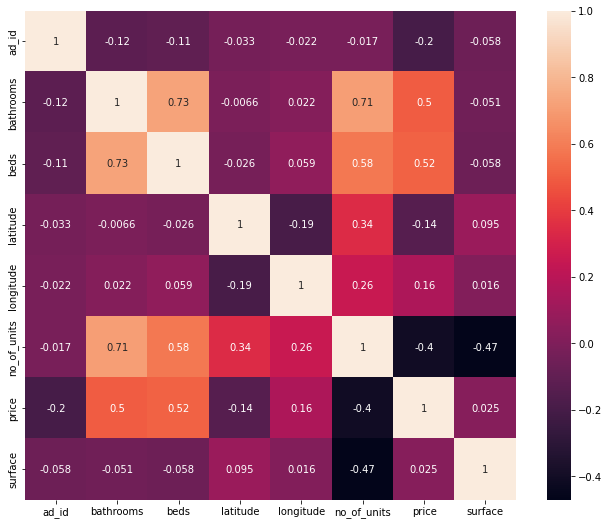

In [398]:
#correlation matrix
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dftrain.corr(), annot=True);


The correlation matrix suggests a positive correlation between `price` and `beds`, `bathrooms` and `surface`, which we further explore with some pair plots.

We can also see that `no_of_units`, `latitude` and `ad_id` have no correlation to the price. We shall remove the columns later


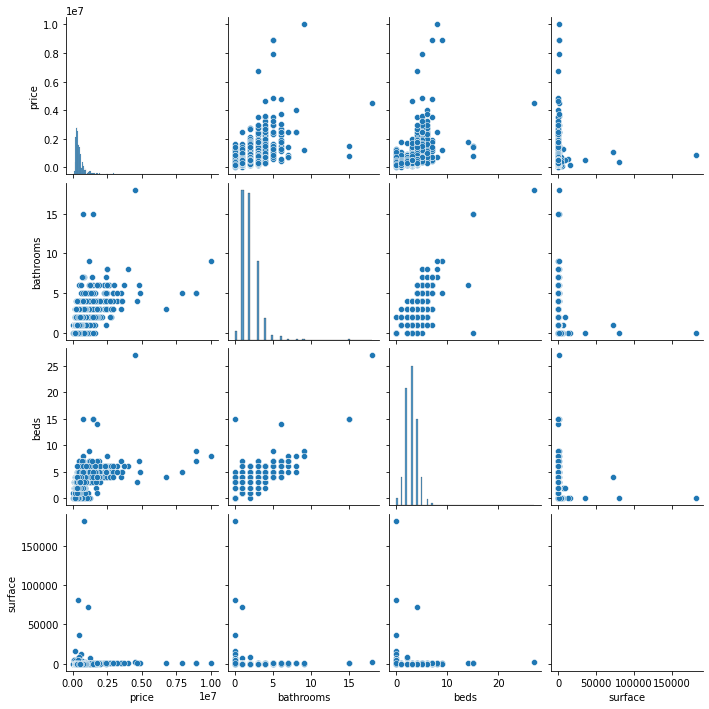

In [399]:
# note that by applying the method dropna() we drop all rows with missing values 
sns.pairplot(data=dftrain[['price','bathrooms','beds','surface']].dropna())
plt.show()

**Quick examination of categorical attributes**

In [400]:
# area
dftrain['area'].value_counts()

Finglas           94
Castleknock       90
Rathfarnham       87
Malahide          81
Lucan             79
                  ..
Edenmore           1
Deansgrange        1
Bayside            1
Kiltipper          1
Ballinascorney     1
Name: area, Length: 156, dtype: int64

Empirically, one should expect that the area has a positive correlation to the price of a house. We shall encode these values

In [401]:
areas = dftrain['area'].unique()
areas

array(['Portmarnock', 'Lucan', 'Rathfarnham', 'Balbriggan', 'Foxrock',
       'Blackrock', 'Templeogue', 'Ballyboughal', 'Ballycullen',
       'Cabinteely', 'Glasnevin', 'Skerries', 'Clongriffin', 'Clonee',
       'Killiney', 'Newcastle', 'Donabate', 'Dublin 2', 'Lusk',
       'Clondalkin', 'Rathgar', 'Glenageary', 'Goatstown',
       'Dun Laoghaire', 'Howth', 'Castleknock', 'Citywest', 'Malahide',
       'Swords', 'Rush', 'Shankill', 'Stepaside', 'Donaghmede',
       'Dublin 4', 'Baldoyle', 'Ranelagh', 'Carrickmines', 'Rathmichael',
       'Loughshinny', 'Finglas', 'Dublin 1', 'Ballsbridge', 'Sandycove',
       'Dalkey', 'Dublin 8', 'Booterstown', 'Ballymun', 'Navan Road (D7)',
       'Cabra', 'Garristown', 'Rialto', 'Drumcondra', 'Clontarf',
       'Dundrum', 'Donnybrook', 'Santry', 'Blanchardstown', 'Sandyford',
       'Palmerstown', 'Sandymount', 'Terenure', 'Crumlin', 'Saggart',
       'Mulhuddart', 'Whitehall', 'Walkinstown', 'Christchurch',
       'Clonskeagh', 'Phibsborough', '

In [402]:
area_mapper = {
    "Portmarnock": 1, 
"Lucan": 2, 
"Rathfarnham": 3, 
"Balbriggan": 4, 
"Foxrock": 5,
       "Blackrock": 6, 
       "Templeogue": 7, 
       "Ballyboughal": 8, 
       "Ballycullen": 9,
       "Cabinteely": 10, 
       "Glasnevin": 11, 
       "Skerries": 12, 
       "Clongriffin": 13, 
       "Clonee": 14,
       "Killiney": 15, 
       "Newcastle": 16, 
       "Donabate": 17, 
       "Dublin 2": 18, 
       "Lusk": 19,
       "Clondalkin": 20, 
       "Rathgar": 21, 
       "Glenageary": 22, 
       "Goatstown": 23,
       "Dun Laoghaire": 24, 
       "Howth": 25, 
       "Castleknock": 26, 
       "Citywest": 27, 
       "Malahide": 28,
       "Swords": 29, 
       "Rush": 30, 
       "Shankill": 31, 
       "Stepaside": 32, 
       "Donaghmede": 33,
       "Dublin 4": 34, 
       "Baldoyle": 35, 
       "Ranelagh": 36, 
       "Carrickmines": 37, 
       "Rathmichael": 38,
       "Loughshinny": 39, 
       "Finglas": 40, 
       "Dublin 1": 41, 
       "Ballsbridge": 42, 
       "Sandycove": 43,
       "Dalkey": 44, 
       "Dublin 8": 45, 
       "Booterstown": 46, 
       "Ballymun": 47, 
       "Navan Road (D7)": 48,
       "Cabra": 49, 
       "Garristown": 50, 
       "Rialto": 51, 
       "Drumcondra": 52, 
       "Clontarf": 53,
       "Dundrum": 54, 
       "Donnybrook": 55, 
       "Santry": 56, 
       "Blanchardstown": 57, 
       "Sandyford": 58,
       "Palmerstown": 59, 
       "Sandymount": 60, 
       "Terenure": 61, 
       "Crumlin": 62, 
       "Saggart": 63,
       "Mulhuddart": 64, 
       "Whitehall": 65, 
       "Walkinstown": 66, 
       "Christchurch": 67,
       "Clonskeagh": 68, 
       "Phibsborough": 69, 
       "Clonsilla": 70, 
       "Ringsend": 71,
       "Churchtown": 72, 
       "Dublin 7": 73, 
       "Tyrrelstown": 74, 
       "Ballybrack": 75,
       "Mount Merrion": 76, 
       "Rathmines": 77, 
       "The Ward": 78, 
       "Kilternan": 79, 
       "Sutton": 80,
       "Harold's Cross": 81, 
       "Clarehall": 82, 
       "Firhouse": 83, 
       "Portobello": 84,
       "Killester": 85, 
       "Monkstown": 86, 
       "Kilmore": 87, 
       "Milltown": 88, 
       "Tallaght": 89,
       "Ballymount": 90, 
       "Loughlinstown": 91, 
       "Clonshaugh": 92, 
       "East Wall": 93,
       "Grand Canal Dock": 94, 
       "Leopardstown": 95, 
       "Artane": 96, 
       "Kinsealy": 97,
       "Poppintree": 98, 
       "Kimmage": 99, 
       "Knocklyon": 100, 
       "Dolphin's Barn": 101, 
       "Raheny": 102,
       "Naul": 103, 
       "Inchicore": 104, 
       "Adamstown": 105, 
       "IFSC": 106, 
       "Kilmainham": 107, 
       "Darndale": 108,
       "Kilnamanagh": 109, 
       "Rathcoole": 110, 
       "Fairview": 111, 
       "Ard Na Greine": 112,
       "North Circular Road": 113, 
       "Beaumont": 114, 
       "Temple Bar": 115, 
       "Drimnagh": 116,
       "Coolock": 117, 
       "Donnycarney": 118, 
       "Stoneybatter": 119, 
       "Ballyfermot": 120,
       "Balgriffin": 121, 
       "North Strand": 122, 
       "Smithfield": 123, 
       "Ballinascorney": 124,
       "Coolmine": 125, 
       "Sallynoggin": 126, 
       "Ongar": 127, 
       "Marino": 128, 
       "Dartry": 129,
       "Ballinteer": 130, 
       "Hartstown": 131, 
       "Ashtown": 132, 
       "Kilmacud": 133, 
       "Carpenterstown": 134,
       "Park West": 135, 
       "Irishtown": 136, 
       "Chapelizod": 137, 
       "Balrothery": 138, 
       "Ballybough": 139,
       "Greenhills": 140, 
       "Perrystown": 141, 
       "Brittas": 142, 
       "Bluebell": 143, 
       "Kingswood": 144,
       "The Coombe": 145, 
       "Edenmore": 146, 
       "Merrion": 147, 
       "Oldbawn": 148, 
       "Deansgrange": 149,
       "Bayside": 150, 
       "Windy Arbour": 151, 
       "Cherry Orchard": 152, 
       "Islandbridge": 153,
       "South Circular Road": 154, 
       "Kiltipper": 155, 
       "St Margaret's": 156
}

In [403]:
# ber_classification
dftrain['ber_classification'].value_counts()

D1                     283
D2                     274
C3                     268
C2                     242
C1                     212
E1                     182
E2                     169
G                      166
F                      165
B3                     130
B2                      74
A3                      70
SINo666of2006exempt     28
A2                      25
B1                      16
A1                       1
Name: ber_classification, dtype: int64

Also empirically, one would expect the Ernergy Rating to affect the price of a property. We shall also encode this field

In [404]:
ber_ratings = dftrain['ber_classification'].unique()
ber_ratings


array([nan, 'A3', 'A2', 'E2', 'G', 'C1', 'F', 'C2', 'C3', 'D2', 'D1',
       'B2', 'E1', 'SINo666of2006exempt', 'B3', 'B1', 'A1'], dtype=object)

In [405]:
ber_mapper = {
    "A1": 1,
    "A2": 2,
    "A3": 3,
    "B1": 4,
    "B2": 5,
    "B3": 6,
    "C1": 7,
    "C2": 8,
    "C3": 9,
    "D1": 10,
    "D2": 11,
    "E1": 12,
    "E2": 13,
    "F": 14,
    "G": 15,
    "SINo666of2006exempt": 16
}

In [406]:
# county
dftrain['county'].value_counts()

Dublin    2982
Name: county, dtype: int64

All values are present and they are all dublin. The `county` attribute is not adding any information and can be assumed and dropped

In [407]:
# description_block
dftrain['description_block'].value_counts()

Sycamore Grove is a small development of 14 houses on Grove Road, in one of the most popular residential locations in Dublin. The houses are large ranging in size from 130 sq.m - 135 sq.m (1,399 sq.ft - 1,453 sq.ft).\n\r\nThese distinctively designed houses feature tasteful brick facades and generous rear gardens. Built by Treverbyn Properties Ltd, each home is finished to the very highest standard with an excellent specification inside and out.\n\r\nGlasnevin has a long and interesting history. Saint Mobhi established a monastery there in the sixth century. The National Botanical Gardens, with its beautiful curvilinear glasshouses, was laid out by botanist Dr. Walter Wade in 1795.\n\r\nGlasnevin is the last resting place of many famous patriots and poets such as Daniel O' Connell Charles Stewart Parnell, Eamon de Valera and Luke Kelly. The stone walls and turrets of the cemetery dominate the pretty squares around the old entrance. \n\r\nLandmarks and institutions include Dublin City U

The `description_block` is free text, thus will not suit for the purpose of our model. We shall drop this attribute

In [408]:
# environment
dftrain['environment'].value_counts()

prod    2982
Name: environment, dtype: int64

All 2982 `environment` have the same value. We can assume that value and drop the attribute

In [409]:
# facility
dftrain['facility'].value_counts()

Parking,Gas Fired Central Heating                                                               184
Parking                                                                                         135
Parking,Gas Fired Central Heating,Wired for Cable Television                                    118
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television                              112
Parking,Gas Fired Central Heating,Alarm                                                          88
Parking,Wired for Cable Television                                                               51
Gas Fired Central Heating                                                                        46
Parking,Alarm                                                                                    26
Parking,Oil Fired Central Heating                                                                24
Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access             19


Empirically we shall expect this attribute to affect the price. So we will encode this for processing

In [410]:
facility_att = dftrain['facility'].unique()
facility_att

array([nan, 'Parking',
       'Parking,Gas Fired Central Heating,Wired for Cable Television',
       'Parking,Alarm,Wired for Cable Television,Oil Fired Central Heating',
       'Parking,Gas Fired Central Heating,Alarm',
       'Parking,Gas Fired Central Heating',
       'Parking,Oil Fired Central Heating',
       'Parking,Gas Fired Central Heating,Wheelchair Access',
       'Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Oil Fired Central Heating',
       'Gas Fired Central Heating',
       'Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television',
       'Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access',
       'Parking,Alarm,Oil Fired Central Heating',
       'Parking,Wired for Cable Television,Oil Fired Central Heating',
       'Parking,Alarm', 'Parking,Wired for Cable Television',
       'Parking,Alarm,Wired for Cable Television',
       'Gas Fired Central Heating,Alarm', 'Wired for Cable Television',
       'Park

In [411]:
facility_mapper = {
    "Parking": 1,
       "Parking,Gas Fired Central Heating,Wired for Cable Television": 2,
       "Parking,Alarm,Wired for Cable Television,Oil Fired Central Heating": 3,
       "Parking,Gas Fired Central Heating,Alarm": 4,
       "Parking,Gas Fired Central Heating": 5,
       "Parking,Oil Fired Central Heating": 6,
       "Parking,Gas Fired Central Heating,Wheelchair Access": 7,
       "Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Oil Fired Central Heating": 8,
       "Gas Fired Central Heating": 9,
       "Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television": 10,
       "Parking,Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access": 11,
       "Parking,Alarm,Oil Fired Central Heating": 12,
       "Parking,Wired for Cable Television,Oil Fired Central Heating": 13,
       "Parking,Alarm": 31,
       "Parking,Wired for Cable Television": 14,
       "Parking,Alarm,Wired for Cable Television": 15,
       "Gas Fired Central Heating,Alarm": 32, 
       "Wired for Cable Television": 16,
       "Parking,Gas Fired Central Heating,Wired for Cable Television,Wheelchair Access": 17,
       "Oil Fired Central Heating": 33, 
       "Alarm,Wired for Cable Television": 18,
       "Gas Fired Central Heating,Wired for Cable Television": 34, 
       "Alarm": 19,
       "Wheelchair Access": 20,
       "Gas Fired Central Heating,Alarm,Wired for Cable Television": 21,
       "Parking,Gas Fired Central Heating,Alarm,Wheelchair Access": 22,
       "Parking,Wheelchair Access,Oil Fired Central Heating": 23,
       "Parking,Wired for Cable Television,Wheelchair Access": 24,
       "Parking,Alarm,Wired for Cable Television,Wheelchair Access": 25,
       "Parking,Wired for Cable Television,Wheelchair Access,Oil Fired Central Heating": 26,
       "Alarm,Oil Fired Central Heating": 27,
       "Gas Fired Central Heating,Alarm,Wired for Cable Television,Wheelchair Access": 28,
       "Parking,Wheelchair Access": 29,
       "Parking,Alarm,Wired for Cable Television,Wheelchair Access,Oil Fired Central Heating": 30
}

In [412]:
# features
dftrain['features'].value_counts()

None                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 1095
Modern fitted kitchen\nAll amenities on your doorstep\n                                                                                                                                                                                                                                                                                                                       

`features` is mostly free style text with most values missing. We will drop this attribute

In [413]:
# property_category
dftrain['property_category'].value_counts()

sale                      2923
new_development_parent      59
Name: property_category, dtype: int64

Empirically whether a house is a new build or and old house does not really affect the price. But let encode this attribute so that we can check it's correlation to price before deciding whether to drop the `property_category` attribute or not.

In [414]:
property_category_att = dftrain['property_category'].unique()
property_category_att

array(['new_development_parent', 'sale'], dtype=object)

In [415]:
property_category_mapper = {
    "new_development_parent": 1,
    "sale": 2
}

In [416]:
# property_type
dftrain['property_type'].value_counts()

apartment         759
semi-detached     754
terraced          554
detached          398
end-of-terrace    237
bungalow           84
duplex             60
site               55
townhouse          27
studio              3
Name: property_type, dtype: int64

We expect the property type to have an effect on the price, hence we are encoding this attribute.

In [417]:
property_type_values = dftrain['property_type'].unique()
property_type_values

array([nan, 'detached', 'semi-detached', 'apartment', 'terraced', 'site',
       'bungalow', 'townhouse', 'end-of-terrace', 'duplex', 'studio'],
      dtype=object)

In [418]:
property_type_mapper = {
    "detached": 1, 
    "semi-detached": 2, 
    "apartment": 3, 
    "terraced": 4, 
    "site": 5,
    "bungalow": 6, 
    "townhouse": 7, 
    "end-of-terrace": 8, 
    "duplex": 9, 
    "studio": 10
}

**Data Preparation**

**we make a copy of the data**

In [419]:
original_dftrain = dftrain.copy(deep=True)
original_dftest = dftest.copy(deep=True)
original_dfcost = dfcost.copy(deep=True)

**Encoding Ordinal Categorical Attributes**

In [420]:
# area
dftrain['area'] = dftrain['area'].replace(area_mapper)
dftest['area'] = dftest['area'].replace(area_mapper)
# dfcost['area'] = dfcost['area'].replace(area_mapper)

# ber_classification
dftrain['ber_classification'] = dftrain['ber_classification'].replace(ber_mapper)
dftest['ber_classification'] = dftest['ber_classification'].replace(ber_mapper)
# dfcost['ber_classification'] = dfcost['ber_classification'].replace(ber_mapper)

# facility_mapper
dftrain['facility'] = dftrain['facility'].replace(facility_mapper)
dftest['facility'] = dftest['facility'].replace(facility_mapper)
# dfcost['facility'] = dfcost['facility'].replace(facility_mapper)

# property_category
dftrain['property_category'] = dftrain['property_category'].replace(property_category_mapper)
dftest['property_category'] = dftest['property_category'].replace(property_category_mapper)
# dfcost['property_category'] = dfcost['property_category'].replace(property_category_mapper)

# property_type
dftrain['property_type'] = dftrain['property_type'].replace(property_type_mapper)
dftest['property_type'] = dftest['property_type'].replace(property_type_mapper)
# dfcost['property_type'] = dfcost['property_type'].replace(property_type_mapper)

**Correlation matrix after encoding some of the attributes**

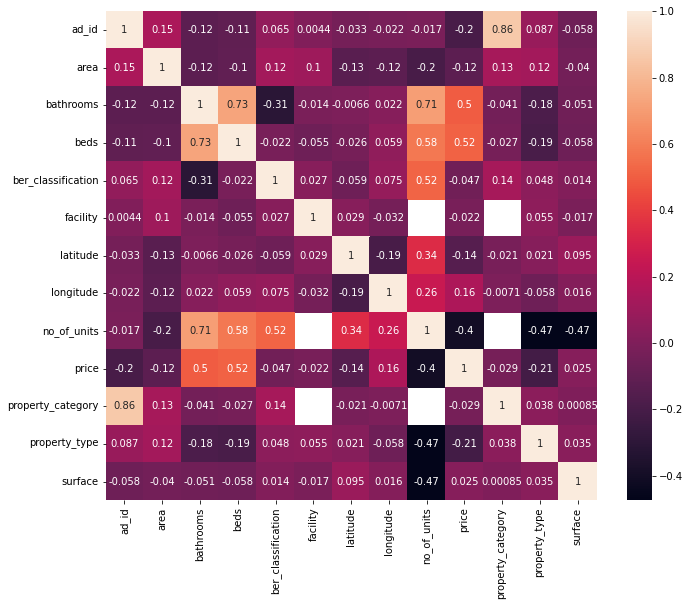

In [421]:
#correlation matrix
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(dftrain.corr(), annot=True);

Attributes with a positive correlation to price are :
* `bathrooms`
* `beds`
* `longitude`
* `surface`

We expected `area` to make this list, but instead we got `longitude`. Thinking about it, these 2 attributes are synonynous.

`property_type` type was also a surprise !

We drop some columns that are either redundant or bare no correlation to price: `ad_id`, `area`, `latitude`, `county`, `environment`, `description_block`, `features`, `ber_classification`, `facility`, `no_of_units`, `property_category`, `property_type`

In [422]:
dftrain.drop(['ad_id', 'area', 'latitude', 'county', 'environment', 'description_block', 'features','no_of_units','property_category', 'ber_classification', 'facility', 'property_type'], axis=1, inplace=True)
dftrain.tail()

,bathrooms,beds,longitude,price,surface
2977,2.0,2.0,-6.237199,415000.0,56.0
2978,1.0,3.0,-6.294268,485000.0,101.0
2979,1.0,2.0,-6.276856,299000.0,55.6
2980,2.0,3.0,-6.178500,495000.0,97.0
2981,2.0,3.0,-6.325158,525000.0,129.3


In [423]:
dftest.drop(['ad_id', 'area', 'latitude', 'county', 'environment', 'description_block', 'features','no_of_units','property_category', 'ber_classification', 'facility', 'property_type'], axis=1, inplace=True)
dftest.head(5)

,bathrooms,beds,longitude,surface
0,2.0,4.0,-6.101148,142.0
1,2.0,3.0,-6.452909,114.0
2,3.0,4.0,-6.262964,172.0
3,4.0,3.0,-6.458647,132.4
4,1.0,3.0,-6.393587,88.0


Let's check the missing values again

In [424]:
dftrain.isna().sum()

bathrooms     51
beds          51
longitude      0
price         90
surface      551
dtype: int64

**Treatment of Missing Values in Numerical Columns**

**Missing prices**

Since we are building a model to predict the price, data without a price is not very usefull. We should drop those rows.

In [425]:
dftrain = dftrain[dftrain['price'].notna()]
# dftest = dftest[dftest['price'].notna()]
dftrain.isna().sum()

bathrooms      0
beds           0
longitude      0
price          0
surface      490
dtype: int64

**Missing surfaces**

We have no mean to accurately estimate the surface of houses, so we decide to drop all the 490 rows where surface is missing

In [426]:
# dftrain[dftrain['surface'].isnull()]

dftrain = dftrain[dftrain['surface'].notna()]
dftest = dftest[dftest['surface'].notna()]
dftrain.isna().sum()

bathrooms    0
beds         0
longitude    0
price        0
surface      0
dtype: int64

**Distribution analysis of the remaining attributes**

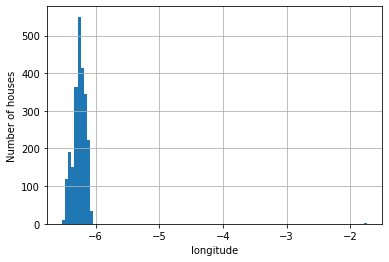

In [427]:
# 'longitude'
dftrain['longitude'].hist(bins=100)
plt.xlabel('longitude')
plt.ylabel('Number of houses')
plt.show()

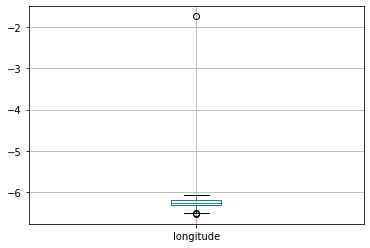

In [428]:
dftrain.boxplot(column='longitude')
plt.show()

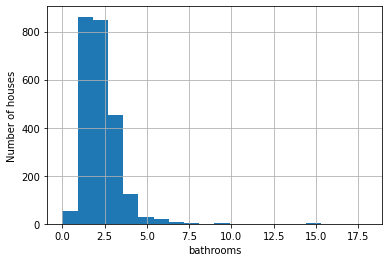

In [429]:
# 'bathrooms'
dftrain['bathrooms'].hist(bins=20)
plt.xlabel('bathrooms')
plt.ylabel('Number of houses')
plt.show()

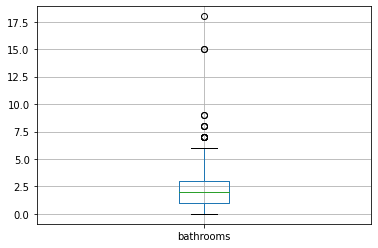

In [430]:
dftrain.boxplot(column='bathrooms')
plt.show()

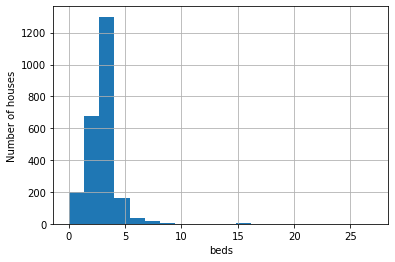

In [431]:
# 'beds'
dftrain['beds'].hist(bins=20)
plt.xlabel('beds')
plt.ylabel('Number of houses')
plt.show()

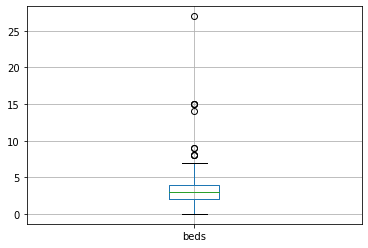

In [432]:
dftrain.boxplot(column='beds')
plt.show()

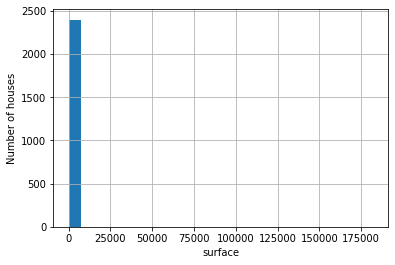

In [433]:
# 'surface'
dftrain['surface'].hist(bins=25)
plt.xlabel('surface')
plt.ylabel('Number of houses')
plt.show()

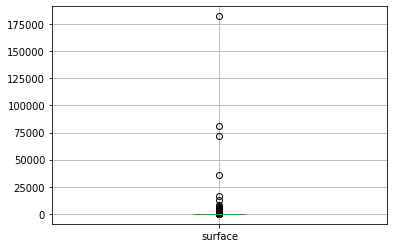

In [434]:
dftrain.boxplot(column='surface')
plt.show()

We observe that `bathrooms`,`beds` and `surface` have outliers so we are using `RobustScaler` to rescale the data 

In [435]:
# robust_scaler = RobustScaler()
# dftrain[['bathrooms','beds','surface']] = robust_scaler.fit_transform(dftrain[['bathrooms','beds','surface']])

# dftest[['bathrooms','beds','surface']] = robust_scaler.fit_transform(dftest[['bathrooms','beds','surface']])

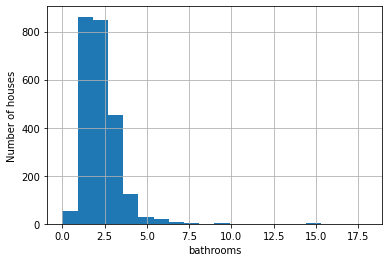

In [436]:
# 'bathrooms'
dftrain['bathrooms'].hist(bins=20)
plt.xlabel('bathrooms')
plt.ylabel('Number of houses')
plt.show()

For `longitude`, only 1 outlier could be observed so we are using a `StandardScaler`

In [437]:
# standard_scaler = StandardScaler()
# dftrain[['longitude']] = standard_scaler.fit_transform(dftrain[['longitude']])

# dftest[['longitude']] = standard_scaler.fit_transform(dftest[['longitude']])

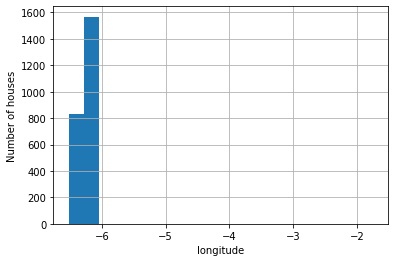

In [438]:
# 'bathrooms'
dftrain['longitude'].hist(bins=20)
plt.xlabel('longitude')
plt.ylabel('Number of houses')
plt.show()

In [439]:
dftrain[['longitude']].min()

longitude   -6.521183
dtype: float64

We still have negative values after the transformation. We need to add a constant to all values in order to shift them to a positive range before applying a log transformation. 

Here we are have chosen to shift the values to the interval $[1, +\infty]$ before applying a log transformation.

In [440]:
# Use a log transformation to decrease the impact of outliers
# dftrain['longitude'] = np.log(dftrain['longitude']+3.05)
# dftest['longitude'] = np.log(dftest['longitude']+3.05)

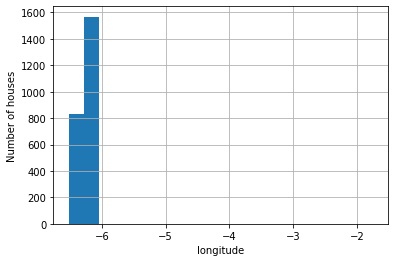

In [441]:
# 'bathrooms'
dftrain['longitude'].hist(bins=20)
plt.xlabel('longitude')
plt.ylabel('Number of houses')
plt.show()

In [442]:
dftrain.shape

(2402, 5)

In [443]:
dftrain.to_csv(syntPath+'house_train_prepared.csv')
dftest.to_csv(syntPath+'house_test_prepared.csv')

## Training & Test Data

In [444]:
# split data into training and test
from sklearn.model_selection import train_test_split

y = dftrain['price']
X = dftrain.drop('price', axis=1).values

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

# PIECEWISE REGRESSION

## Full Model

In [445]:
# select some features columns just for the baseline model
# assume not all of the features are informative or useful
# in this exercise you could try all of them if possible

featrain = ['bathrooms','beds','surface','longitude','price']
# dropna: remove missing values
df_subset_train = dftrain[featrain].dropna(axis=0)

featest = ['bathrooms','beds','surface','longitude']
df_subset_test  =  dftest[featest].dropna(axis=0)

# cost
dfcost = dfcost[dfcost.index.isin(df_subset_test.index)]

In [446]:
print('Number of nan in df_subset_train dataset: ',df_subset_train.isnull().sum().sum())
print('Number of nan in df_subset_test dataset: ',df_subset_test.isnull().sum().sum())

Number of nan in df_subset_train dataset:  0
Number of nan in df_subset_test dataset:  0


In [447]:
# train set, input columns
Xs_train = df_subset_train.iloc[:,0:-1].values 
# train set, output column, cost
ys_train = df_subset_train.iloc[:,-1].values.reshape(-1,1)   

# test set, input columns
Xs_test = df_subset_test.iloc[:,0:].values 
# test set, output column, cost
y_test = dfcost.Expected.values

In [448]:
# StandardScaler() will normalize the features i.e. each column of X, 
# so, each column/feature/variable will have μ = 0 and σ = 1
sc = StandardScaler()

Xss_train = np.hstack([Xs_train,Xs_train[:,[2]]**2])
xscaler = sc.fit(Xss_train)
Xn_train = xscaler.transform(Xss_train)
Xn_train = Xs_train

Xss_test = np.hstack([Xs_test,Xs_test[:,[2]]**2])
Xn_test = xscaler.transform(Xss_test)
Xn_test = Xs_test

ylog = np.log(ys_train.astype('float'))
yscaler = StandardScaler().fit(ylog)
yn_train = yscaler.transform(ylog)
yn_train = ys_train

In [449]:
# model
with pm.Model() as model:
    #prior over the parameters of linear regression
    alpha = pm.Normal('alpha', mu=0, sigma=30)
    #we have one beta for each column of Xn
    beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn_train.shape[1])
    #prior over the variance of the noise
    sigma = pm.HalfCauchy('sigma_n', 5)
    #linear regression model in matrix form
    mu = alpha + pm.math.dot(beta, Xn_train.T)
    #likelihood, be sure that observed is a 1d vector
    like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn_train[:,0])
    

Finished [100%]: Average Loss = 36,142


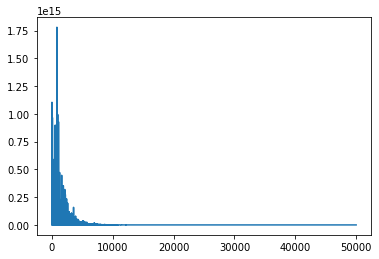

In [450]:
#number of iterations of the algorithms
iter = 50000 

# run the model
with model:
    approximation = pm.fit(iter,method='advi')
    
# check the convergence
plt.plot(approximation.hist);

In [451]:
# samples from the posterior
posterior = approximation.sample(5000)

In [452]:
# prediction
ll=np.mean(posterior['alpha']) + np.dot(np.mean(posterior['beta'],axis=0), Xn_test.T)
y_pred_BLR = np.exp(yscaler.inverse_transform(ll.reshape(-1,1)))[:,0]
print("MAE = ",(np.mean(abs(y_pred_BLR - y_test))))
print("MAPE = ",(np.mean(abs(y_pred_BLR - y_test) / y_test)))

MAE =  inf
MAPE =  inf


## Clustering

### Full Model

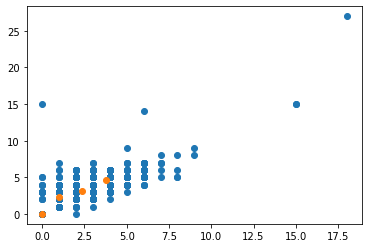

In [453]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
# clustering by features 1, 2
ind=[0,1]
X_ind = np.vstack([Xn_train[:,ind],Xn_test[:,ind]])
# Gaussian Mixture
gmm.fit(X_ind)
# plot blue dots
plt.scatter(X_ind[:,0],X_ind[:,1])
# centroids:  orange dots
plt.scatter(gmm.means_[:,0],gmm.means_[:,1])


In [454]:
np.max(ys_train)

9995000.0

### Clusters

In [455]:
# train clusters
clusters_train = gmm.predict(Xn_train[:,ind])
unique_train, counts_train = np.unique(clusters_train, return_counts=True)
dict(zip(unique_train, counts_train))



{0: 1284, 1: 218, 2: 861, 3: 39}

In [456]:
# test clusters
clusters_test = gmm.predict(Xn_test[:,ind])
unique_test, counts_test = np.unique(clusters_test, return_counts=True)
dict(zip(unique_test, counts_test))

{0: 271, 1: 47, 2: 172, 3: 10}

In [457]:
# cluster 0
Xn0 = Xn_train[clusters_train==0,:]
Xtestn0 = Xn_test[clusters_test==0,:]

ylog0 = np.log(ys_train.astype('float')[clusters_train==0,:])
yscaler0 = StandardScaler().fit(ylog0)
yn0 = yscaler0.transform(ylog0)

In [458]:
# cluster 1
Xn1 = Xn_train[clusters_train==1,:]
Xtestn1 = Xn_test[clusters_test==1,:]
ylog1 = np.log(ys_train.astype('float')[clusters_train==1,:])
yscaler1 = StandardScaler().fit(ylog1)
yn1 = yscaler1.transform(ylog1)

In [459]:
# cluster 2
Xn2 = Xn_train[clusters_train==2,:]
Xtestn2 = Xn_test[clusters_test==2,:]
ylog2 = np.log(ys_train.astype('float')[clusters_train==2,:])
yscaler2 = StandardScaler().fit(ylog2)
yn2 = yscaler2.transform(ylog2)

In [460]:
# cluster 3
Xn3 = Xn_train[clusters_train==3,:]
Xtestn3 = Xn_test[clusters_test==3,:]
ylog3 = np.log(ys_train.astype('float')[clusters_train==3,:])
yscaler3 = StandardScaler().fit(ylog3)
yn3 = yscaler3.transform(ylog3)

## Piecewise Model

In [461]:
# model_0
with pm.Model() as model_0:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn0
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn0.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn0.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn0[:,0])

with model_0:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior0 = approximation.sample(5000)



Finished [100%]: Average Loss = 1,703.1


In [462]:
# model_1
with pm.Model() as model_1:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn1.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  #linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn1.T)
  # likelihood, # 
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn1[:,0])
  
with model_1:
  # iterations of the algorithm
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior1 = approximation.sample(5000)

Finished [100%]: Average Loss = 363.5


In [463]:
# model_2
with pm.Model() as model_2:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn2.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  # linear regression model in matrix form
  mu = alpha + pm.math.dot(beta, Xn2.T)
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn2[:,0])
    
with model_2:
  # iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior    
posterior2 = approximation.sample(5000)

Finished [100%]: Average Loss = 1,813.5


In [464]:
# model_3
with pm.Model() as model3:
  # prior over the parameters of linear regression
  alpha = pm.Normal('alpha', mu=0, sigma=30)
  # we have a beta for each column of Xn
  beta = pm.Normal('beta', mu=0, sigma=30, shape=Xn3.shape[1])
  # prior over the variance of the noise
  sigma = pm.HalfCauchy('sigma_n', 5)
  # linear regression relationship
  mu = alpha + pm.math.dot(beta, Xn3.T)#linear regression model in matrix form
  # likelihood, be sure that observed is a 1d vector
  like = pm.Normal('like', mu=mu, sigma=sigma, observed=yn3[:,0])
    
with model3:
  # number of iterations of the algorithms
  approximation = pm.fit(40000,method='advi')

# samples from the posterior     
posterior3 = approximation.sample(5000)

Finished [100%]: Average Loss = 200.11


In [465]:
#############

In [466]:
# Posterior predictive checks (PPCs)
def ppc(alpha,beta,sigma, X,  nsamples=500):
    #we select nsamples random samples from the posterior
    ind = np.random.randint(0,beta.shape[0],size=nsamples)
    alphai = alpha[ind]
    betai = beta[ind,:]
    sigmai = sigma[ind]

    Ypred = np.zeros((nsamples,X.shape[0]))
    for i in range(X.shape[0]):
        #we generate data from linear model
        y_pred = alphai + np.dot(betai, X[i:i+1,:].T).T +np.random.randn(len(sigmai))*sigmai
        Ypred[:,i]=y_pred[0,:]
    return Ypred


##Simulations

### Only Cluster 0

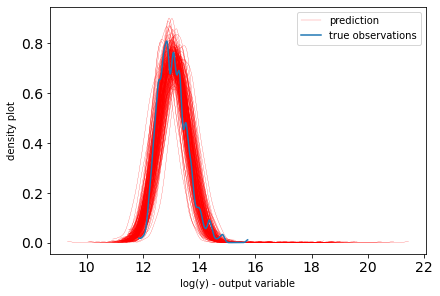

In [467]:
#Simulation
Ypred0 = yscaler0.inverse_transform(ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200))
for i in range(Ypred0.shape[0]):
    az.plot_dist( Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred0[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog0,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 1

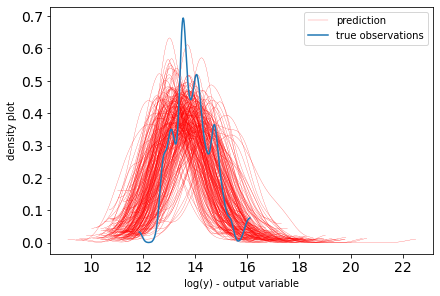

In [468]:
#Simulation
Ypred1 = yscaler1.inverse_transform(ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200))
for i in range(Ypred1.shape[0]):
    az.plot_dist( Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred1[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog1,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 2

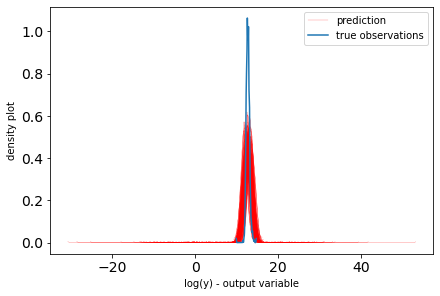

In [469]:
#Simulation
Ypred2 = yscaler2.inverse_transform(ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200))
for i in range(Ypred2.shape[0]):
    az.plot_dist( Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred2[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog2,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

### Only Cluster 3

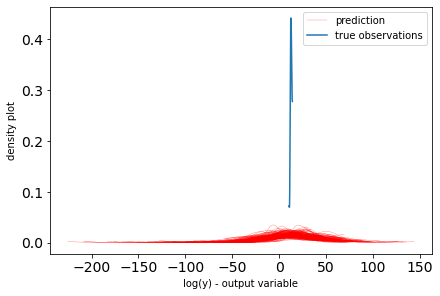

In [470]:
#Simulation
Ypred3 = yscaler3.inverse_transform(ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200))
for i in range(Ypred3.shape[0]):
    az.plot_dist( Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2})
az.plot_dist(Ypred3[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
#plt.plot(np.linspace(-8,8,100),norm.pdf(np.linspace(-8,8,100),df=np.mean(posterior_1['nu'])))
#plt.xlim([0,10e7])
az.plot_dist(ylog3,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Overall

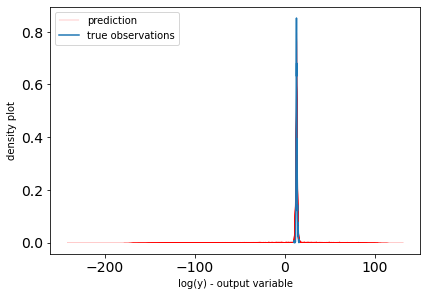

In [471]:
# posteriors
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xn0,  nsamples=200)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xn1,  nsamples=200)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xn2,  nsamples=200)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xn3,  nsamples=200)

# simulation
Ypred = np.hstack([ yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# prediction
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})

# plot
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")
ylog=np.vstack([ylog0,ylog1,ylog2,ylog3])
az.plot_dist(ylog,label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

## Test set performance

In [472]:
# cluster 0
y_pred_BLR0 = np.exp(yscaler0.inverse_transform(np.mean(posterior0['alpha']) 
              + np.dot(np.mean(posterior0['beta'],axis=0), Xtestn0.T)))
print("Size Cluster0", np.sum(clusters_test==0), ", MAE Cluster0=",
      (np.mean(abs(y_pred_BLR0 - y_test[clusters_test==0]))))

# cluster 1
y_pred_BLR1 = np.exp(yscaler1.inverse_transform(np.mean(posterior1['alpha']) 
              + np.dot(np.mean(posterior1['beta'],axis=0), Xtestn1.T)))
print("Size Cluster1", np.sum(clusters_test==1), ", MAE Cluster1=",
      (np.mean(abs(y_pred_BLR1 - y_test[clusters_test==1]))))

# cluster 2
y_pred_BLR2 = np.exp(yscaler2.inverse_transform(np.mean(posterior2['alpha']) 
              + np.dot(np.mean(posterior2['beta'],axis=0), Xtestn2.T)))
print("Size Cluster2", np.sum(clusters_test==2), ", MAE Cluster2=",
      (np.mean(abs(y_pred_BLR2 - y_test[clusters_test==2]))))

# cluster 3
y_pred_BLR3 = np.exp(yscaler3.inverse_transform(np.mean(posterior3['alpha']) 
              + np.dot(np.mean(posterior3['beta'],axis=0), Xtestn3.T)))
print("Size Cluster3", np.sum(clusters_test==3), ", MAE Cluster3=",
      (np.mean(abs(y_pred_BLR3 - y_test[clusters_test==3]))))

# joint
joint=np.hstack([abs(y_pred_BLR0 - y_test[clusters_test==0]),
                 abs(y_pred_BLR1 - y_test[clusters_test==1]),
                 abs(y_pred_BLR2 - y_test[clusters_test==2]),
                 abs(y_pred_BLR3 - y_test[clusters_test==3])])

# MAE
print("MAE=",np.mean(joint))

Size Cluster0 271 , MAE Cluster0= 233734.62540084432
Size Cluster1 47 , MAE Cluster1= 610595.0492127276
Size Cluster2 172 , MAE Cluster2= 89910.05927267745
Size Cluster3 10 , MAE Cluster3= 262634.8466274313
MAE= 220261.85891560366


### PPC on the Test set



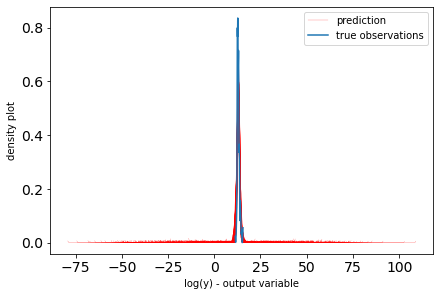

In [473]:
## Posterior predictive checks (PPCs)

num_samples2 = 200
Ypred0 = ppc(posterior0['alpha'],posterior0['beta'],posterior0['sigma_n'],Xtestn0, nsamples=num_samples2)
Ypred1 = ppc(posterior1['alpha'],posterior1['beta'],posterior1['sigma_n'],Xtestn1, nsamples=num_samples2)
Ypred2 = ppc(posterior2['alpha'],posterior2['beta'],posterior2['sigma_n'],Xtestn2, nsamples=num_samples2)
Ypred3 = ppc(posterior3['alpha'],posterior3['beta'],posterior3['sigma_n'],Xtestn3, nsamples=num_samples2)

# Stack arrays in sequence horizontally (column wise)
Ypred = np.hstack([yscaler0.inverse_transform(Ypred0),
                 yscaler1.inverse_transform(Ypred1),
                 yscaler2.inverse_transform(Ypred2),
                 yscaler3.inverse_transform(Ypred3)])

# plot prediction shape
for i in range(Ypred.shape[0]):
    az.plot_dist( Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2})
# label
az.plot_dist(Ypred[i,:],color='r',plot_kwargs={"linewidth": 0.2}, label="prediction")

# true observations
az.plot_dist(np.log(y_test),label='true observations');
plt.legend()
plt.xlabel("log(y) - output variable")
plt.ylabel("density plot");

# SUMMARY